In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

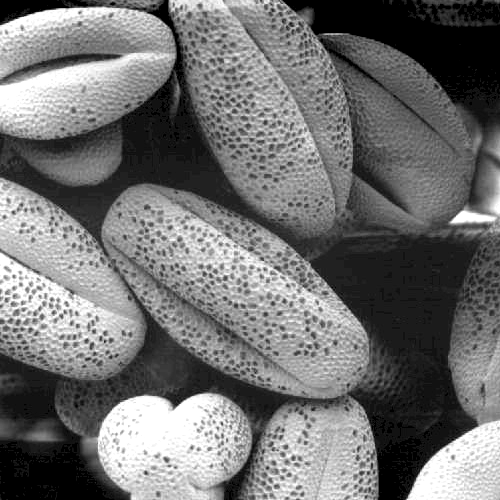

In [120]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/high_contrast.tif')
cv2_imshow(img)

## Task1

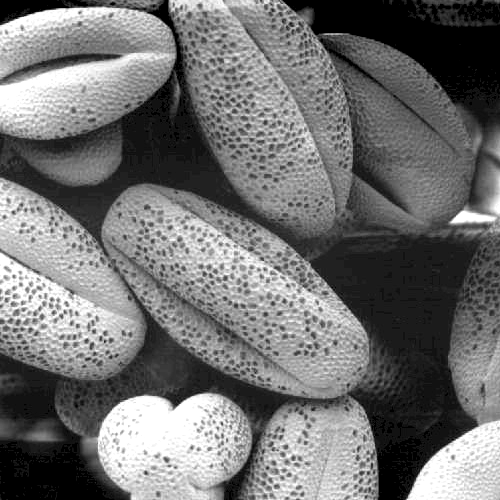

In [121]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

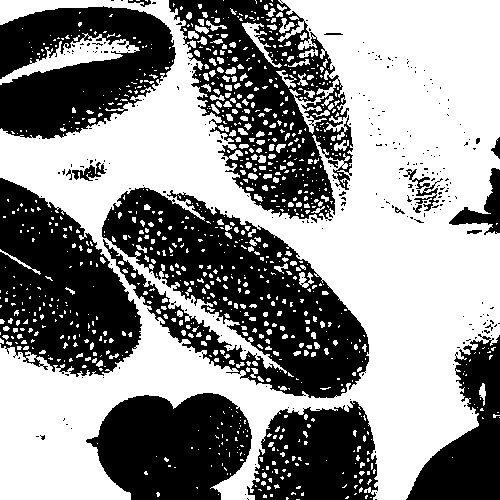

In [122]:
def thresholdimg(img, n):
    img_shape = img.shape
    height = img_shape[0]
    width = img_shape[1]
    for row in range(width):
        for column in range(height):
            if img[column, row] > n:
                img[column, row] = 0
            else:
                img[column, row] = 255
    return img

image1 = thresholdimg(img,127)
cv2_imshow(img)

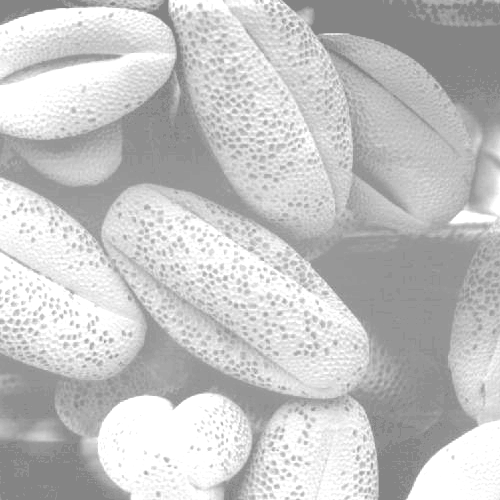

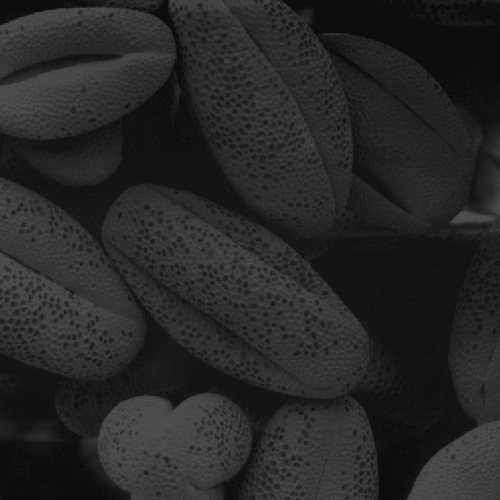

In [123]:
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/bright.tif')
cv2_imshow(img1)
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/dark.tif')
cv2_imshow(img2)

## Task2

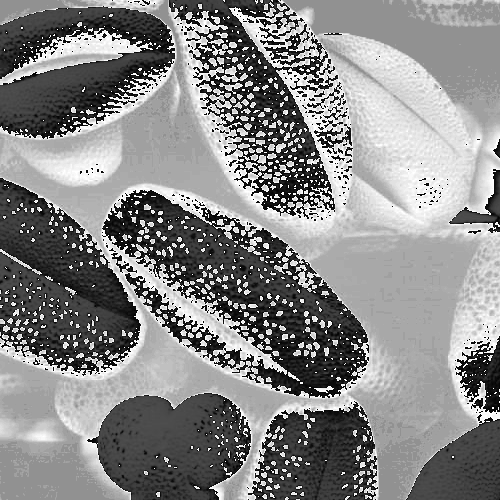

In [124]:
res = img1+img2
cv2_imshow(res)

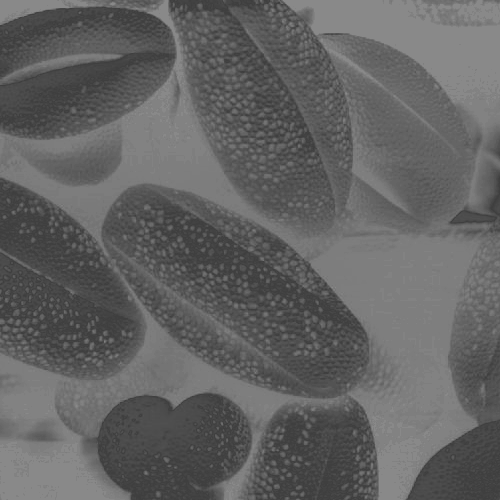

In [125]:
res2 = img2-img1
cv2_imshow(res2)

## Task3

## Logtransformation

<ipython-input-126-974eb5109b6d>:6: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img1 + 1))
<ipython-input-126-974eb5109b6d>:8: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype = np.uint8)


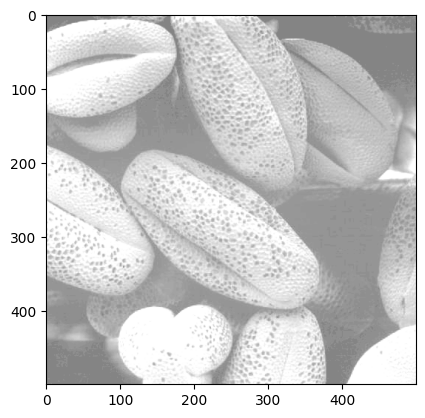

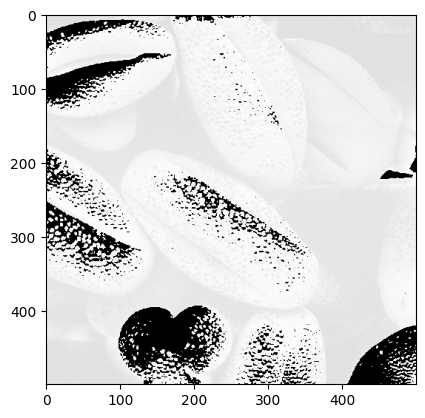

In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

c = 255 / np.log(1 + np.max(img1))
log_image = c * (np.log(img1 + 1))

log_image = np.array(log_image, dtype = np.uint8)

plt.imshow(img1)
plt.show()
plt.imshow(log_image)
plt.show()

## power transformation

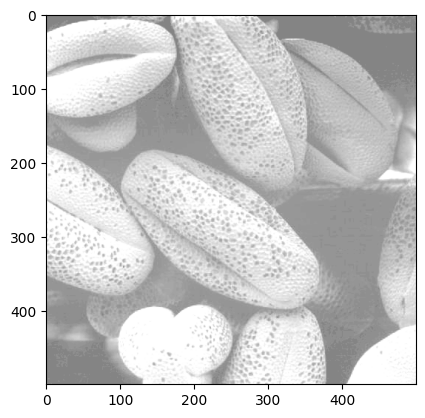

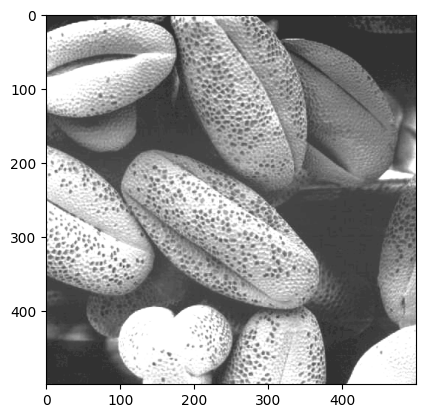

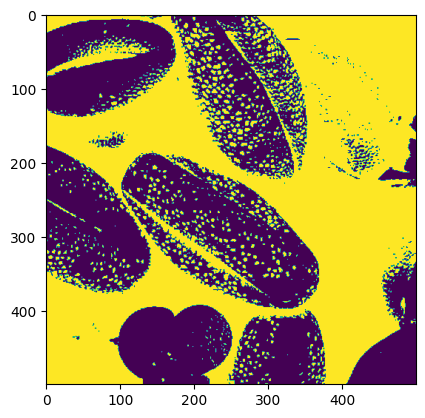

In [127]:
gamma_two_point_two = np.array(255*(img1/255)**2.5,dtype='uint8')
gamma_point_four = np.array(255*(img/255)**0.2,dtype='uint8')
plt.imshow(img1)
plt.show()
plt.imshow(gamma_two_point_two)
plt.show()
plt.imshow(gamma_point_four)
plt.show()

## Contast Stretching

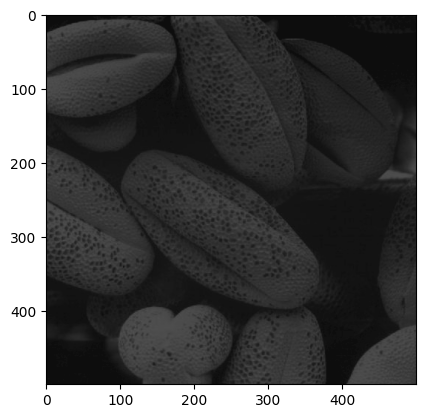

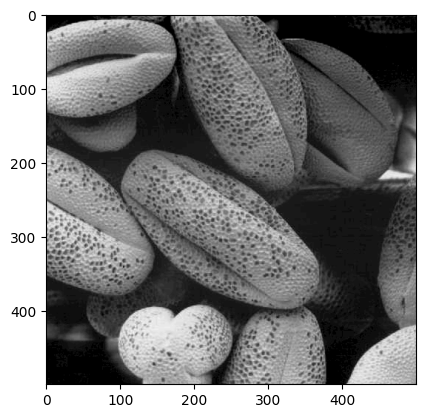

In [128]:
original = img2.copy()
minVal = np.min(img2)
maxVal = np.max(img2)
xp = [minVal, maxVal]
fp = [0, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img2 = cv2.LUT(img2, table)
plt.imshow(original)
plt.show()
plt.imshow(img2)
plt.show()

## Grey Level Sclicing

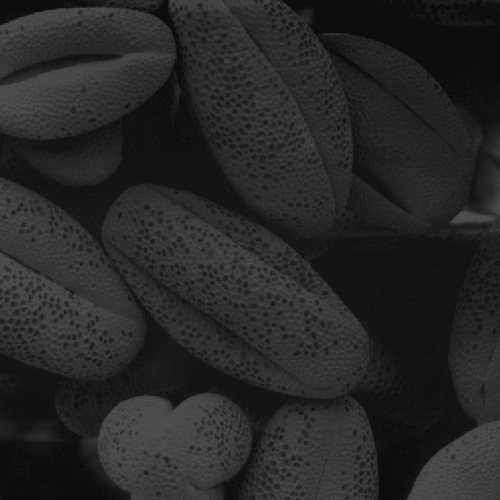

In [129]:
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/dark.tif')
cv2_imshow(img2)

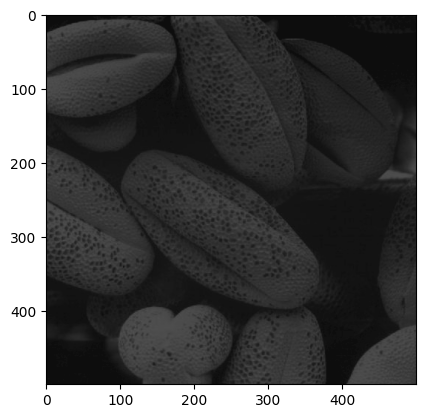

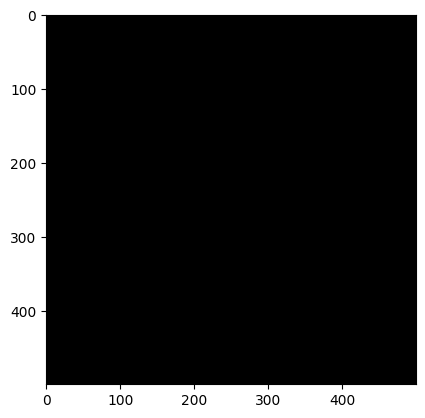

In [130]:
original = img2.copy()
low, High = 100, 200
original = img2.copy()
img2 = np.where((img2 >= low) & (img2 <= High), 255, 0)
plt.imshow(original)
plt.show()
plt.imshow(img2)
plt.show()

## Bit Plane Sclicing

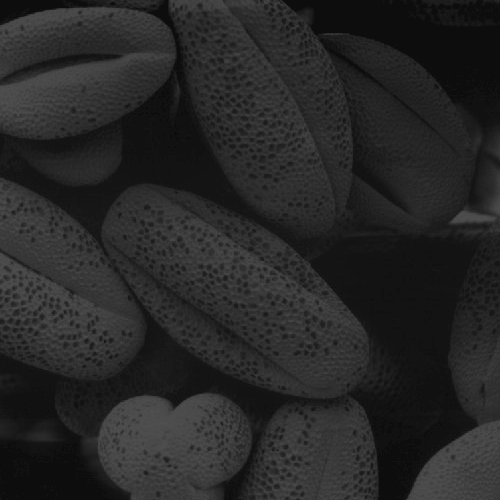

In [131]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/dark.tif'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

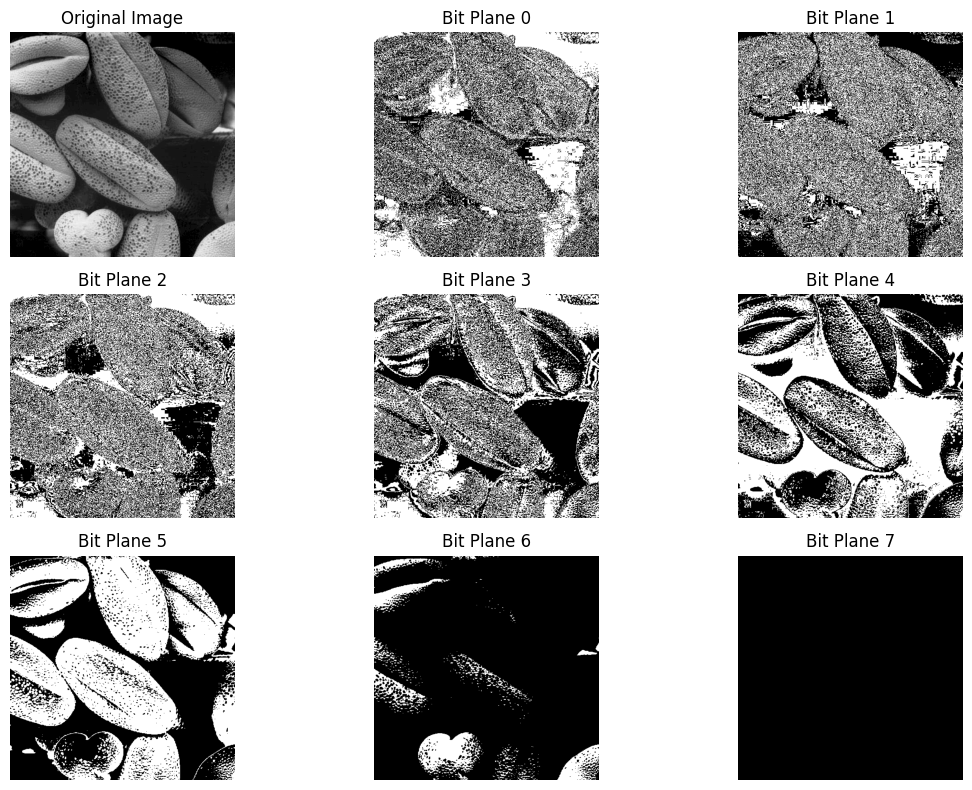

In [132]:
def bit_plane_slicing(img, bit):
    height, width = img.shape
    bit_plane = np.zeros((height, width), dtype=np.uint8)

    for row in range(height):
        for col in range(width):
            bit_value = (img[row, col] >> bit) & 1
            bit_plane[row, col] = bit_value * 255

    return bit_plane

plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i in range(8):
    bit_plane_image = bit_plane_slicing(img, i)
    plt.subplot(3, 3, i + 2)
    plt.imshow(bit_plane_image, cmap='gray')
    plt.title(f"Bit Plane {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Contrast Stretching

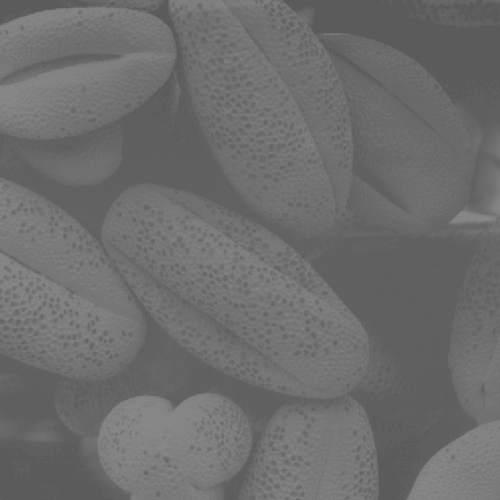

In [133]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/low_contrast.tif'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
original = img.copy()

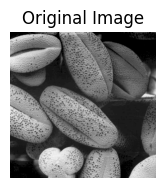

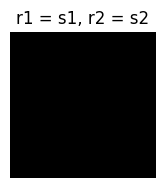

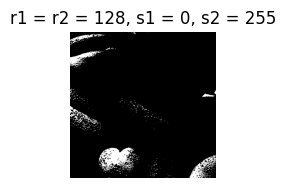

In [134]:
def contrast_stretching(img, r1, s1, r2, s2):
    img_stretched = np.zeros_like(img, dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_value = img[i, j]
            if pixel_value <= r1:
                img_stretched[i, j] = s1
            elif pixel_value > r2:
                img_stretched[i, j] = s2
            else:
                img_stretched[i, j] = int((s2 - s1) / (r2 - r1) * (pixel_value - r1) + s1)

    return img_stretched


# part a
output_a = contrast_stretching(img, r1=0, s1=0, r2=52, s2=255)

# part b
output_b = contrast_stretching(img, r1=128, s1=0, r2=128, s2=255)

# Show original image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.subplot(1, 3, 2)
plt.imshow(output_a, cmap='gray')
plt.title("r1 = s1, r2 = s2")
plt.axis('off')
plt.show()

plt.subplot(1, 3, 3)
plt.imshow(output_b, cmap='gray')
plt.title("r1 = r2 = 128, s1 = 0, s2 = 255")
plt.axis('off')
plt.show()



## Lab Task 4

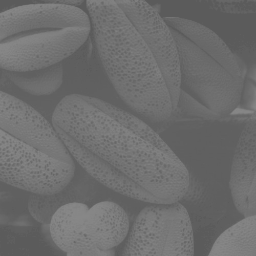

In [135]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/low_contrast.tif'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (256, 256))
cv2_imshow(resized_image)

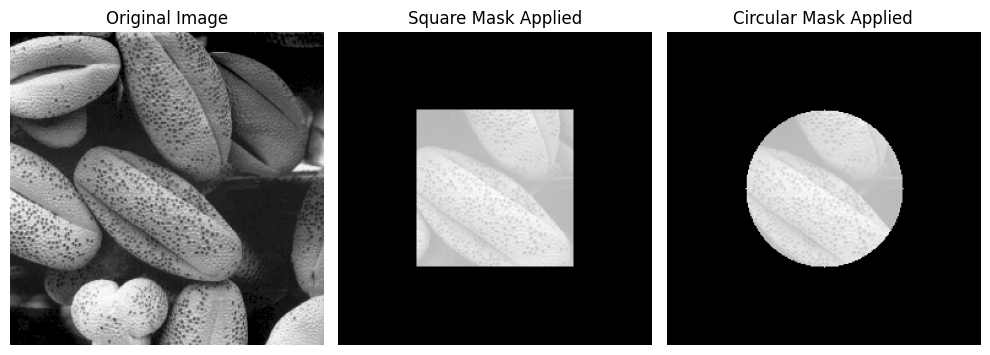

In [136]:
from PIL import Image

resized_image_pil = Image.fromarray(resized_image)
resized_image_data = resized_image_pil.load()

# Create a square mask
square_mask = [[0]*256 for _ in range(256)]
for i in range(64, 192):
    for j in range(64, 192):
        square_mask[i][j] = 255

image_square_masked = Image.new('L', (256, 256))
for i in range(256):
    for j in range(256):
        pixel_value = resized_image_data[j, i] if square_mask[i][j] == 255 else 0
        image_square_masked.putpixel((j, i), pixel_value)

# Create a circular mask
circular_mask = [[0]*256 for _ in range(256)]
center_y, center_x = 128, 128
radius = 64
for i in range(256):
    for j in range(256):
        if (i - center_y)**2 + (j - center_x)**2 <= radius**2:
            circular_mask[i][j] = 255

image_circular_masked = Image.new('L', (256, 256))
for i in range(256):
    for j in range(256):
        pixel_value = resized_image_data[j, i] if circular_mask[i][j] == 255 else 0
        image_circular_masked.putpixel((j, i), pixel_value)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(resized_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_square_masked, cmap='gray')
plt.title('Square Mask Applied')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_circular_masked, cmap='gray')
plt.title('Circular Mask Applied')
plt.axis('off')

plt.tight_layout()
plt.show()

## Lab Task 5

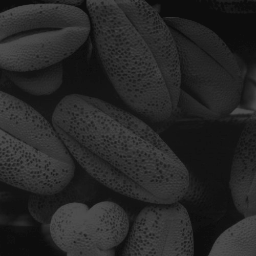

In [137]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/dark.tif'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (256, 256))
original = resized_image.copy()
cv2_imshow(resized_image)

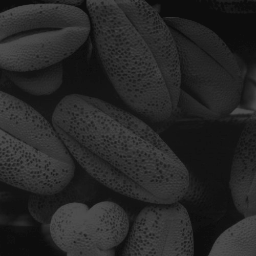

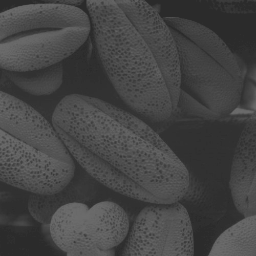

In [138]:
resized_image_pil = Image.fromarray(resized_image)

def add_brightness(image, value):
    bright_image = Image.new('L', image.size)
    width, height = image.size
    for i in range(width):
        for j in range(height):
            pixel_value = image.getpixel((i, j)) + value
            bright_image.putpixel((i, j), max(0, min(255, pixel_value)))
    return bright_image

bright_image = add_brightness(resized_image_pil,30)

bright_image_array = np.array(bright_image)

cv2_imshow(original)
cv2_imshow(bright_image_array)

## Lab Task 6

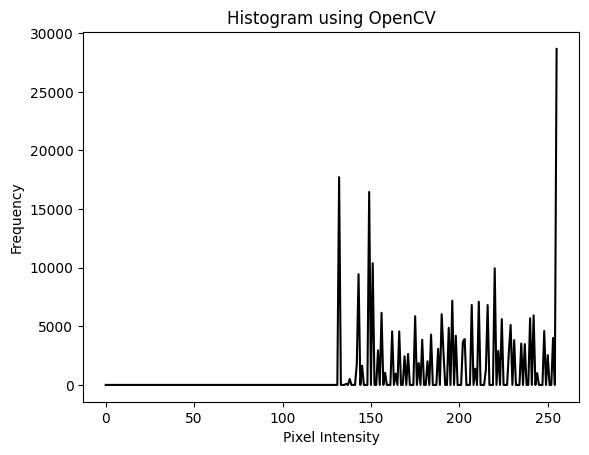

In [142]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/bright.tif', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(hist, color='black')
plt.title("Histogram using OpenCV")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

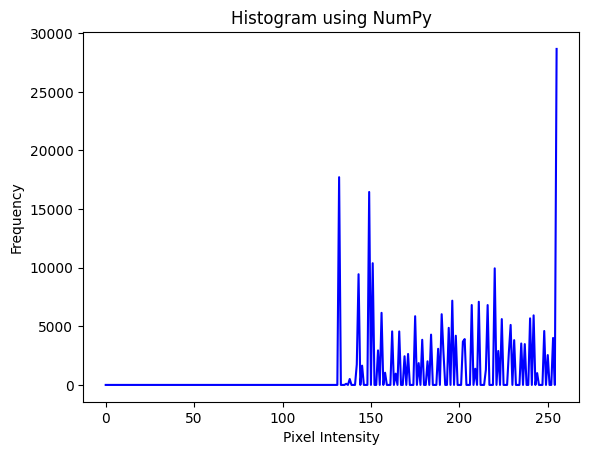

In [143]:
hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

plt.plot(hist, color='blue')
plt.title("Histogram using NumPy")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

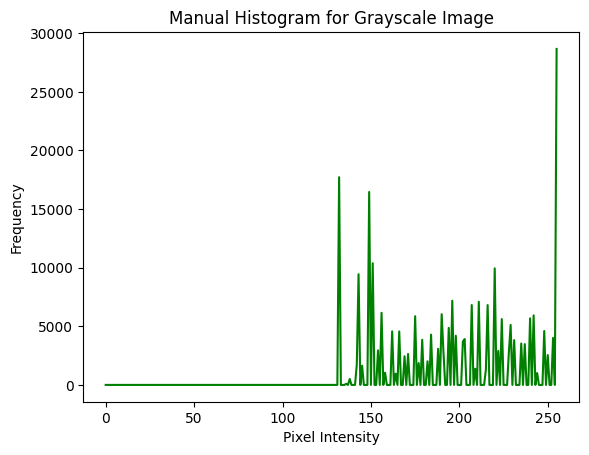

In [144]:
def calculate_histogram_manual(image):
    histogram = [0] * 256
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
    return histogram

grayscale_hist = calculate_histogram_manual(image)
plt.plot(grayscale_hist, color='green')
plt.title("Manual Histogram for Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

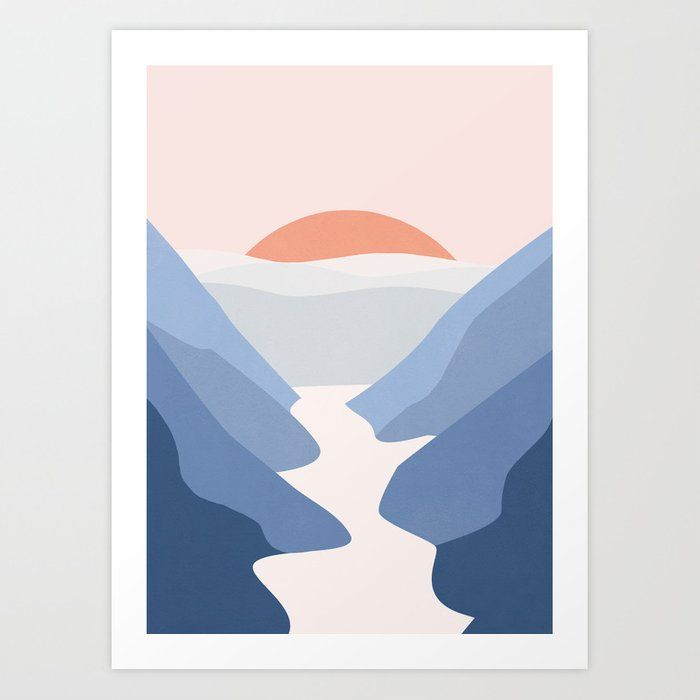

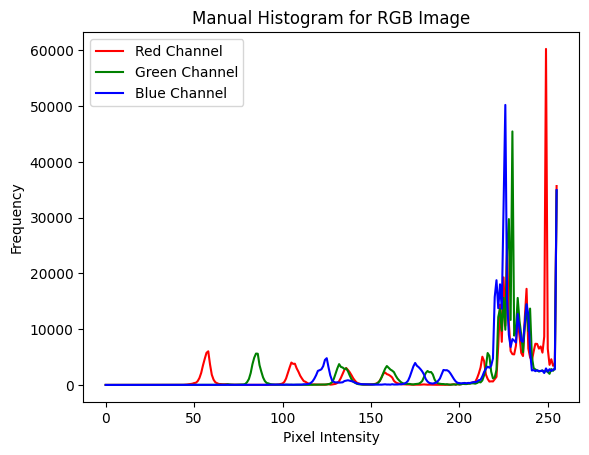

In [145]:
def calculate_histogram_rgb_manual(image):
    height, width, _ = image.shape
    hist_r, hist_g, hist_b = [0] * 256, [0] * 256, [0] * 256

    for i in range(height):
        for j in range(width):
            pixel_r, pixel_g, pixel_b = image[i, j]
            hist_r[pixel_r] += 1
            hist_g[pixel_g] += 1
            hist_b[pixel_b] += 1

    return hist_r, hist_g, hist_b

image_rgb = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab01a/Lab01a/eb9931c3f39215a193826992d013a17a.jpg')
cv2_imshow(image_rgb)
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

hist_r, hist_g, hist_b = calculate_histogram_rgb_manual(image_rgb)

plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.title("Manual Histogram for RGB Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [139]:
img_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/bright.tif',
    '/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/dark.tif',
    '/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/high_contrast.tif',
    '/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab02/low_contrast.tif'
]

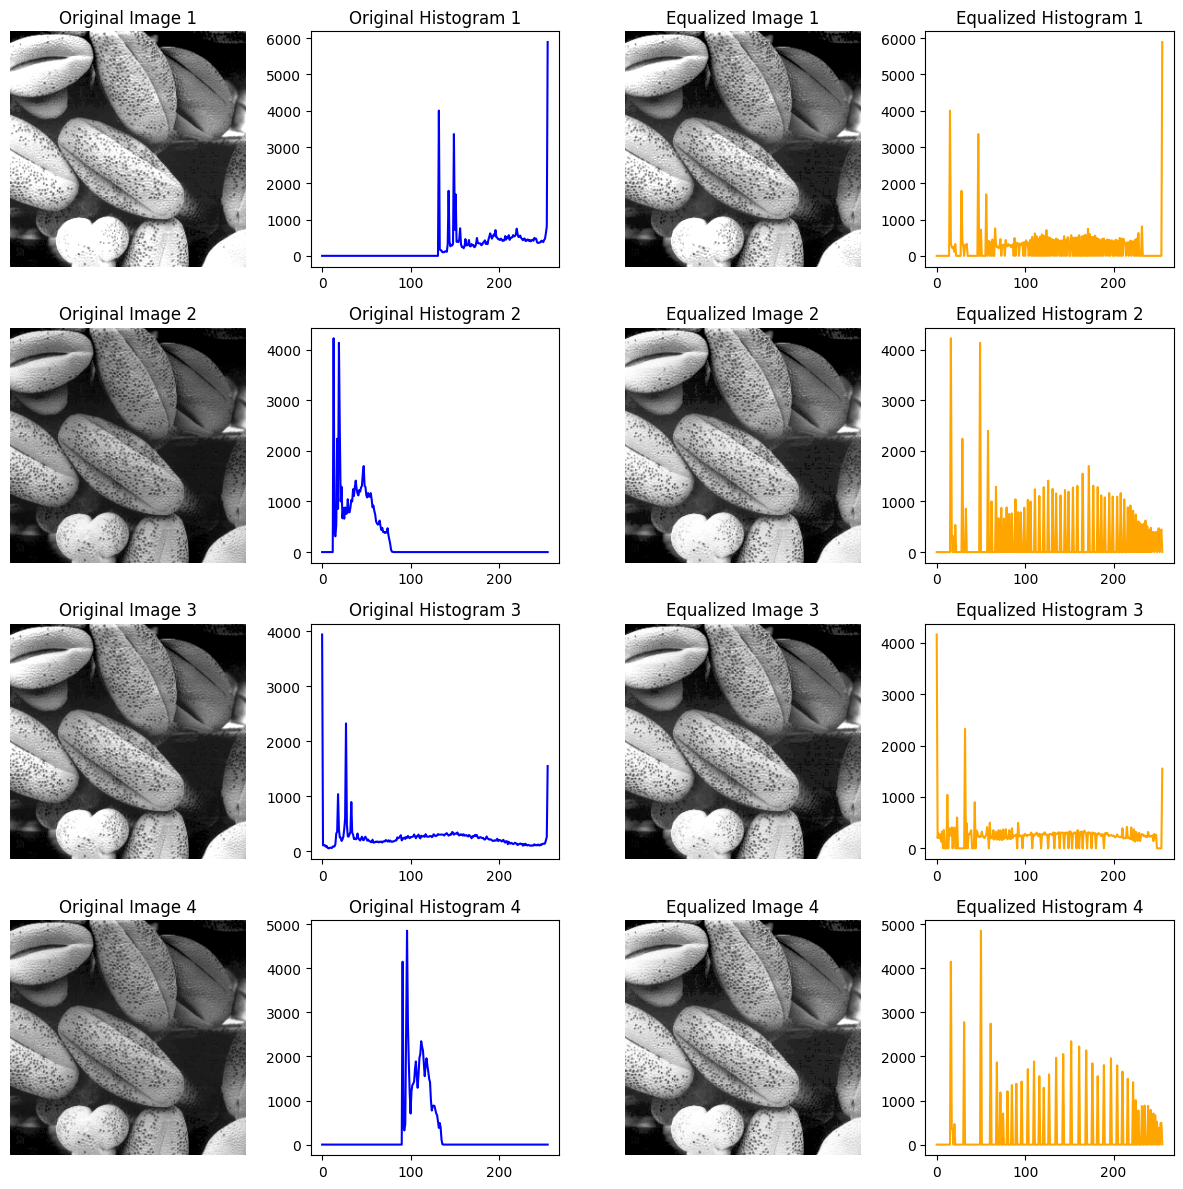

In [141]:
def calculate_histogram_manual(image):
    histogram = [0] * 256
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
    return histogram

def histogram_equalization_manual(image):
    histogram = calculate_histogram_manual(image)
    total_pixels = image.size
    cdf = [0] * 256
    cdf[0] = histogram[0]

    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]

    cdf_min = min(cdf)
    equalized_image = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            equalized_pixel_value = ((cdf[pixel_value] - cdf_min) / (total_pixels - cdf_min)) * 255
            equalized_image[i, j] = int(equalized_pixel_value)

    return equalized_image

plt.figure(figsize=(12, 12))

for index, img_path in enumerate(img_paths):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (256, 256))
    original = resized_image.copy()

    original_histogram = calculate_histogram_manual(original)
    equalized_image = histogram_equalization_manual(resized_image)
    equalized_histogram = calculate_histogram_manual(equalized_image)

    plt.subplot(4, 4, index * 4 + 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title('Original Image {}'.format(index + 1))
    plt.axis('off')

    plt.subplot(4, 4, index * 4 + 2)
    plt.plot(original_histogram, color='blue')
    plt.title('Original Histogram {}'.format(index + 1))

    plt.subplot(4, 4, index * 4 + 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image {}'.format(index + 1))
    plt.axis('off')

    plt.subplot(4, 4, index * 4 + 4)
    plt.plot(equalized_histogram, color='orange')
    plt.title('Equalized Histogram {}'.format(index + 1))

plt.tight_layout()
plt.show()